Similar to Experiment 75, but here we use the version of SMC-RWM and MS-RWM that is in the python script. In particular:

- Weights are computed and normalized using the log-sum-exp trick.
- Sequence of tolerances is chosen adaptively based on quantile of distances.
- Particles are initially sampled from the prior but then we set $\epsilon_0 = \max d_{i}$ where $d_i$ are the distances between the particle $i$ and the manifold.
- Step size is adapted based on the proxy-acceptance-probability

In [1]:
import numpy as np
from numpy import zeros, eye, array, diag, exp, ones
from numpy.linalg import solve, norm
from numpy.random import choice, default_rng
from scipy.stats import multivariate_normal as MVN
from scipy.special import logsumexp
from scipy.stats import uniform as udist
import math
import time
from copy import deepcopy

import matplotlib.pyplot as plt
from matplotlib import rc
from ipywidgets.widgets import IntSlider
from ipywidgets.widgets import interact
from warnings import resetwarnings

from Manifolds.GeneralizedEllipseNew import GeneralizedEllipse
from markov_snippets import MSAdaptive, SMCAdaptive

In [4]:
def generate_settings(
    d=10, 
    N=5000,
    B=20,
    δ=0.1,
    δmin=1e-3,
    δmax=100.0,
    εmin=1e-8,
    min_pm=1e-4,
    maxiter=500,
    verbose=True,
    εs_fixed=None,
    adaptiveε=True,
    adaptiveδ=True,
    z0_manual=None,
    pm_target=0.23,
    pm_switch=0.05,
    prior_seed=1234,
    low_memory=True,
    integrator='rwm',
    εprop_switch=0.01,
    ε0_manual=None,
    quantile_value=0.9,
    initialization='prior',
    switch_strategy='pm',
    prior='uniform',
    kernel='uniform',
    prior_scale=7,
    thinning=10,
    burnin=100):
    # Generate the manifold
    μ = zeros(d)
    Σ = diag(np.r_[0.1, ones(d-1)])  
    level_set_value = -23
    manifold = GeneralizedEllipse(μ, Σ, exp(level_set_value), prior=prior, kernel=kernel, prior_scale=prior_scale)
    # grab arguments
    arguments = locals()
    return arguments

In [5]:
SETTINGS_RWM           = generate_settings(integrator='rwm')
SETTINGS_THUG          = generate_settings(integrator='thug')
SETTINGS_RWM_THEN_THUG = generate_settings(integrator='rwm_then_thug')

# Random Walk Only

#### SMC

In [7]:
SMC_RWM = SMCAdaptive(SETTINGS_RWM)
_ = SMC_RWM.sample()

Stochastic Kernel: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Particles resampled.
	Epsilon: 260.5650365021
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.38800000
	Step-size adapted to: 0.10822043
Iteration:  2
	Particles resampled.
	Epsilon: 219.1175396815
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.36980000
	Step-size adapted to: 0.11605569
Iteration:  3
	Particles resampled.
	Epsilon: 187.6015815676
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.34620000
	Step-size adapted to: 0.12299826
Iteration:  4
	Particles resampled.
	Epsilon: 159.9685568927
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.33080000
	Step-size adapted to: 0.12935624
Iteration:  5
	Particles resampled.
	Epsilon: 137.7428543791
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.33220000
	Step-size adapted to: 0.13613815
Iteration:  6
	Particles resampled.
	Epsilon: 121.7269352881
	

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.19160000
	Step-size adapted to: 0.11398538
Iteration:  49
	Particles resampled.
	Epsilon: 13.4742153788
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18720000
	Step-size adapted to: 0.11157201
Iteration:  50
	Particles resampled.
	Epsilon: 12.6302877209
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18140000
	Step-size adapted to: 0.10889348
Iteration:  51
	Particles resampled.
	Epsilon: 11.9250658531
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18980000
	Step-size adapted to: 0.10672657
Iteration:  52
	Particles resampled.
	Epsilon: 11.2252045960
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.17460000
	Step-size adapted to: 0.10381082
Iteration:  53
	Particles resampled.
	Epsilon: 10.5647596986
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.17260000
	Step-size adapted to: 0.10087380
Iteration:  54
	Particl

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03540000
	Step-size adapted to: 0.00777544
Iteration:  97
	Particles resampled.
	Epsilon: 0.1497046426
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03260000
	Step-size adapted to: 0.00704466
Iteration:  98
	Particles resampled.
	Epsilon: 0.1357702802
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03620000
	Step-size adapted to: 0.00639406
Iteration:  99
	Particles resampled.
	Epsilon: 0.1219992382
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03240000
	Step-size adapted to: 0.00579254
Iteration:  100
	Particles resampled.
	Epsilon: 0.1067024266
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.02820000
	Step-size adapted to: 0.00523659
Iteration:  101
	Particles resampled.
	Epsilon: 0.0979347872
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.02640000
	Step-size adapted to: 0.00472974
Iteration:  102
	Particles

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.00140000
	Step-size adapted to: 0.00100000
Iteration:  145
	Particles resampled.
	Epsilon: 0.0011728120
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.00120000
	Step-size adapted to: 0.00100000
Iteration:  146
	Particles resampled.
	Epsilon: 0.0010795184
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.00000000
	Step-size adapted to: 0.00100000


#### Markov Snippets

In [8]:
MS_RWM = MSAdaptive(SETTINGS_RWM)
_ = MS_RWM.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.28439548
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.923
	Step-size adapted to: 0.14139681
Iteration:  2
	Trajectories constructed.
	Epsilon: 214.20267370
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.919
	Step-size adapted to: 0.19957102
Iteration:  3
	Trajectories constructed.
	Epsilon: 176.36118966
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.895
	Step-size adapted to: 0.27823614
Iteration:  4
	Trajectories constructed.
	Epsilon: 144.88262082
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.863
	Step-size adapted to: 0.38190435
Iteration:  5
	Trajectories constructed.
	Epsilon: 122.98398956
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop M

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.193
	Step-size adapted to: 1.42991486
Iteration:  44
	Trajectories constructed.
	Epsilon: 6.92780978
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.195
	Step-size adapted to: 1.40482804
Iteration:  45
	Trajectories constructed.
	Epsilon: 6.29847902
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.196
	Step-size adapted to: 1.38142408
Iteration:  46
	Trajectories constructed.
	Epsilon: 5.78379731
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.196
	Step-size adapted to: 1.35800255
Iteration:  47
	Trajectories constructed.
	Epsilon: 5.24182492
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.184
	Step-size adapted to: 1.32712495
Iteration:  48
	Trajectories constructed.
	Epsilon: 4.77089543
	Weights computed and nor

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.112
	Step-size adapted to: 0.20388787
Iteration:  87
	Trajectories constructed.
	Epsilon: 0.07156099
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.086
	Step-size adapted to: 0.18970499
Iteration:  88
	Trajectories constructed.
	Epsilon: 0.06429575
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.099
	Step-size adapted to: 0.17769528
Iteration:  89
	Trajectories constructed.
	Epsilon: 0.05886497
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.095
	Step-size adapted to: 0.16608010
Iteration:  90
	Trajectories constructed.
	Epsilon: 0.05302614
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.092
	Step-size adapted to: 0.15502249
Iteration:  91
	Trajectories constructed.
	Epsilon: 0.04779408
	Weights computed and nor

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.056
	Step-size adapted to: 0.00811464
Iteration:  129
	Trajectories constructed.
	Epsilon: 0.00091891
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.062
	Step-size adapted to: 0.00746086
Iteration:  130
	Trajectories constructed.
	Epsilon: 0.00085279
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.049
	Step-size adapted to: 0.00681394
Iteration:  131
	Trajectories constructed.
	Epsilon: 0.00075916
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.058
	Step-size adapted to: 0.00625243
Iteration:  132
	Trajectories constructed.
	Epsilon: 0.00067639
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.047
	Step-size adapted to: 0.00570458
Iteration:  133
	Trajectories constructed.
	Epsilon: 0.00061078
	Weights computed an

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.003
	Step-size adapted to: 0.00100000
Iteration:  171
	Trajectories constructed.
	Epsilon: 0.00001308
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.007
	Step-size adapted to: 0.00100000
Iteration:  172
	Trajectories constructed.
	Epsilon: 0.00001161
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.003
	Step-size adapted to: 0.00100000
Iteration:  173
	Trajectories constructed.
	Epsilon: 0.00001058
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.005
	Step-size adapted to: 0.00100000
Iteration:  174
	Trajectories constructed.
	Epsilon: 0.00000956
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.006
	Step-size adapted to: 0.00100000
Iteration:  175
	Trajectories constructed.
	Epsilon: 0.00000856
	Weights computed an

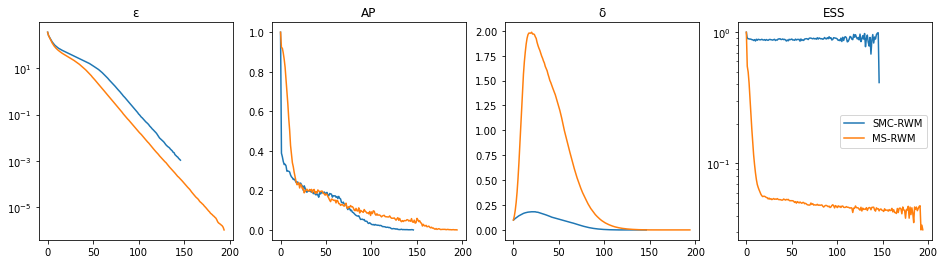

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(16, 4))
# Tolerances
ax[0].plot(SMC_RWM.εs, label='SMC-RWM')
ax[0].plot(MS_RWM.εs, label='MS-RWM')
ax[0].set_yscale('log')
ax[0].set_title("ε")
# Acceptance Probability
ax[1].plot(SMC_RWM.APS, label='SMC-RWM')
ax[1].plot(MS_RWM.PROP_MOVED, label='MS-RWM')
ax[1].set_title("AP")
# Step size
ax[2].plot(SMC_RWM.δs, label='SMC-RWM')
ax[2].plot(MS_RWM.δs, label='MS-RWM')
ax[2].set_title("δ")
# ESS
ax[3].plot(np.array(SMC_RWM.ESS) / SMC_RWM.N, label='SMC-RWM')
ax[3].plot(np.array(MS_RWM.ESS) / (MS_RWM.N*(MS_RWM.B+1)), label='MS-RWM')
ax[3].set_title("ESS")
ax[3].set_yscale('log')
plt.legend()
plt.show()

# Random Walk switch to THUG

#### SMC

In [ ]:
SMC_RWM_THEN_THUG = SMCAdaptive(SETTINGS_RWM_THEN_THUG)
_ = SMC_RWM_THEN_THUG.sample()

Stochastic Kernel: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Particles resampled.
	Epsilon: 256.9076322585
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.39180000
	Step-size adapted to: 0.10842625
Iteration:  2
	Particles resampled.
	Epsilon: 215.6101769729
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.38440000
	Step-size adapted to: 0.11712833
Iteration:  3
	Particles resampled.
	Epsilon: 183.0263270990
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.35460000
	Step-size adapted to: 0.12465753
Iteration:  4
	Particles resampled.
	Epsilon: 156.0459879608
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.34580000
	Step-size adapted to: 0.13208824
Iteration:  5
	Particles resampled.
	Epsilon: 134.3484448175
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.32620000
	Step-size adapted to: 0.13859696
Iteration:  6
	Particles resampled.
	Epsilon: 119.1135812021
	

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18040000
	Step-size adapted to: 0.11032937
Iteration:  49
	Particles resampled.
	Epsilon: 12.5167647954
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18640000
	Step-size adapted to: 0.10795022
Iteration:  50
	Particles resampled.
	Epsilon: 11.7412222458
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.17400000
	Step-size adapted to: 0.10496954
Iteration:  51
	Particles resampled.
	Epsilon: 11.0231126401
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18020000
	Step-size adapted to: 0.10238807
Iteration:  52
	Particles resampled.
	Epsilon: 10.2801407340
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18240000
	Step-size adapted to: 0.09998000
Iteration:  53
	Particles resampled.
	Epsilon: 9.6068784431
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18080000
	Step-size adapted to: 0.09755050
Iteration:  54
	Particle

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.88280000
	Step-size adapted to: 0.09296938
Iteration:  96
	Particles resampled.
	Epsilon: 0.1265153431
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.86980000
	Step-size adapted to: 0.12801791
Iteration:  97
	Particles resampled.
	Epsilon: 0.1146744617
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.84160000
	Step-size adapted to: 0.17381129
Iteration:  98
	Particles resampled.
	Epsilon: 0.1024911978
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.76360000
	Step-size adapted to: 0.22695918
Iteration:  99
	Particles resampled.
	Epsilon: 0.0906406488
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.65360000
	Step-size adapted to: 0.28049901
Iteration:  100
	Particles resampled.
	Epsilon: 0.0810777786
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.53720000
	Step-size adapted to: 0.32706868
Iteration:  101
	Particles 

#### Markov Snippets

In [ ]:
MS_RWM_THEN_THUG = MSAdaptive(SETTINGS_RWM_THEN_THUG)
_ = MS_RWM_THEN_THUG.sample()

# THUG Only

#### SMC

#### Markov Snippets

# MS-RWM

In [6]:
MS_RWM = MSAdaptive(SETTINGS)
_ = MS_RWM.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Trajectories constructed.
	Epsilon: 54.16241336
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.942
	Step-size adapted to: 0.14278931
Iteration:  2
	Trajectories constructed.
	Epsilon: 25.77651326
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.929
	Step-size adapted to: 0.20256690
Iteration:  3
	Trajectories constructed.
	Epsilon: 11.24247345
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.904
	Step-size adapted to: 0.28377174
Iteration:  4
	Trajectories constructed.
	Epsilon: 2.31867338
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.826
	Step-size adapted to: 0.38232468
Iteration:  5
	Trajectories constructed.
	Epsilon: 0.23457022
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0

# SMC

In [17]:
# def generate_setting_old(p, B, δ, N, ϵ0=20, thinning=10, thug=True, verbose=True, initialization='init_RWMϵ0', burnin=100, δ0=0.01, kernel_type='uniform', ϵmin=1e-4, quantile_value=0.01, maxiter=50, ϵprop_switch=0.05, pmoved_switch=0.15, switch_strategy='ap', δmin=1e-4, δmax=100.0, ap_target=0.3, use_autograd=False, init_manifold_prior=True, min_prop_moved=1e-3, seed_for_prior_initialization=1234, prior_scale=10):
#     """Generates an object from which one can grab the settings. This allows one to run multiple scenarios."""
#     μ  = zeros(p)
#     Σ  = diag(np.r_[0.1, ones(p-1)])             
#     level_set_value = -23    
#     ellipse = GeneralizedEllipse(μ, Σ, exp(level_set_value), prior='uniform', kernel='uniform', prior_scale=prior_scale)
#     ξ0 = ellipse.sample(advanced=True)
#     resetwarnings()
#     if δ0 is None:
#         δ0 = δ
#     return {
#         'd' : p,
#         'ystar': level_set_value,
#         'ξ0': ξ0,
#         'B': B,
#         'δ': δ,
#         'N': N,
#         'manifold': ellipse,
#         'thinning': thinning,
#         'thug': thug,
#         'verbose': verbose,
#         'initialization': initialization,
#         'burnin': burnin,
#         'δ0': δ0,
#         'kernel_type': kernel_type,
#         'ϵmin': ϵmin,
#         'quantile_value': quantile_value,
#         'maxiter': maxiter,
#         'ϵprop_switch': ϵprop_switch,
#         'pmoved_switch': pmoved_switch,
#         'switch_strategy': switch_strategy,
#         'δmin': δmin,
#         'δmax': δmax,
#         'ap_target': ap_target,
#         'ϵ0': ϵ0,
#         'use_autograd': use_autograd,
#         'init_manifold_prior': init_manifold_prior,
#         'min_prop_moved': 1e-3,
#         'seed_for_prior_initialization': seed_for_prior_initialization
#     }

In [21]:
# SETTINGS_OLD = generate_setting_old(
#     p=10,
#     B=20, 
#     δ=0.1, 
#     N=5000, 
#     thinning=10, 
#     δ0=0.01, 
#     kernel_type='uniform', 
#     thug=False, 
#     verbose=True, 
#     initialization='init_prior', 
#     burnin=100, 
#     maxiter=500, 
#     ϵmin=1e-8, 
#     quantile_value=0.9,
#     δmin=1e-3, 
#     δmax=100.0, 
#     ap_target=0.23,
#     min_prop_moved=1e-4,
#     seed_for_prior_initialization=1234,
#     prior_scale=20
# )

In [6]:
SMC_RWM = SMCAdaptive(SETTINGS)
_ = SMC_RWM.sample()

Stochastic Kernel: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Particles resampled.
	Epsilon: 53.0567328124
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03780000
	Step-size adapted to: 0.09083732


####################################
### SWITCHING TO THUG KERNEL ###
####################################


Iteration:  2
	Particles resampled.
	Epsilon: 25.4666551962
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.08720000
	Step-size adapted to: 0.08457766
Iteration:  3
	Particles resampled.
	Epsilon: 11.3762551889
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.09820000
	Step-size adapted to: 0.07918368
Iteration:  4
	Particles resampled.
	Epsilon: 5.6746942120
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07160000
	Step-size adapted to: 0.07315425
Iteration:  5
	Particles resampled.
	Epsilon: 5.6438988746
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0

	Epsilon: 5.4386585064
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07340000
	Step-size adapted to: 0.00207253
Iteration:  49
	Particles resampled.
	Epsilon: 5.4386548005
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07260000
	Step-size adapted to: 0.00191568
Iteration:  50
	Particles resampled.
	Epsilon: 5.4386529822
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07160000
	Step-size adapted to: 0.00176981
Iteration:  51
	Particles resampled.
	Epsilon: 5.4386520735
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07120000
	Step-size adapted to: 0.00163472
Iteration:  52
	Particles resampled.
	Epsilon: 5.4386508412
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.08060000
	Step-size adapted to: 0.00151705
Iteration:  53
	Particles resampled.
	Epsilon: 5.4386502324
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07800000
	Step-size adapted to: 0.00140603
Itera

# MS

In [ ]:
# MS_RWM = MSAdaptiveTolerancesAdaptiveδUni(SETTINGS)
# _ = MS_RWM.sample()

# Comparison

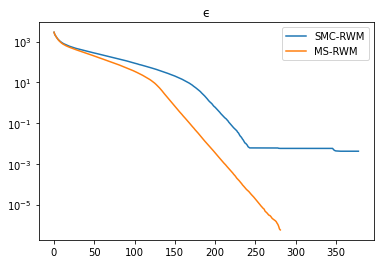

In [29]:
fig, ax = plt.subplots()
ax.set_title("ϵ")
ax.plot(SMC_RWM.ϵs, label='SMC-RWM')
ax.plot(MS_RWM.ϵs, label='MS-RWM')
ax.set_yscale('log')
ax.legend()
plt.show()

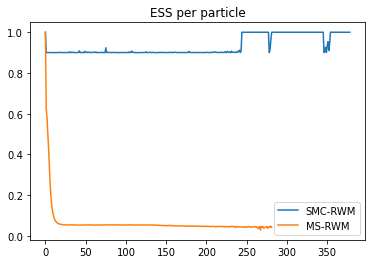

In [24]:
fig, ax = plt.subplots()
ax.set_title("ESS per particle")
ax.plot(np.array(SMC_RWM.ESS)/SMC_RWM.N, label='SMC-RWM')
ax.plot(np.array(MS_RWM.ESS)/(MS_RWM.N*(MS_RWM.B+1)), label='MS-RWM')
ax.legend()
plt.show()

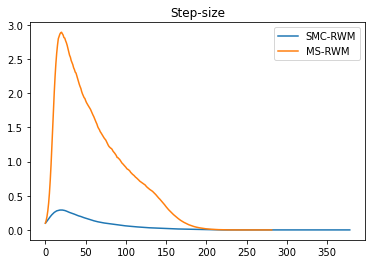

In [25]:
fig, ax = plt.subplots()
ax.set_title("Step-size")
ax.plot(SMC_RWM.δs, label='SMC-RWM')
ax.plot(MS_RWM.δs, label='MS-RWM')
ax.legend()
plt.show()

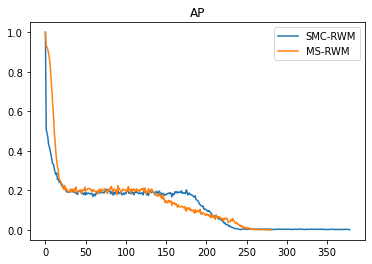

In [27]:
fig, ax = plt.subplots()
ax.set_title("AP")
ax.plot(SMC_RWM.aps, label='SMC-RWM')
ax.plot(MS_RWM.PROP_MOVED, label='MS-RWM')
ax.legend()
plt.show()

In [32]:
def plot_histogram(n):
    fig, ax = plt.subplots(figsize=(20, 4))
    _, bins, _ = ax.hist(MS_RWM.K_RESAMPLED[n, :], density=True, bins=20, edgecolor='k', color='lightsalmon')
    ax.set_xticks(bins)
    ax.set_xticklabels(bins.astype(int))
    return plt.show()
    
interact(plot_histogram, n=(0, len(MS_RWM.ϵs) - 2))

interactive(children=(IntSlider(value=140, description='n', max=280), Output()), _dom_classes=('widget-interac…

<function __main__.plot_histogram(n)>